In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
#Carga y muestra del dataset
automobile_df = pd.read_csv('auto-mpg.csv', sep = ",")
# Ver 5 registros aleatorios
automobile_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
345,35.1,4,81.0,60,1760,16.1,81,3,honda civic 1300
210,19.0,6,156.0,108,2930,15.5,76,3,toyota mark ii
384,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto)
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
339,26.6,4,151.0,84,2635,16.4,81,1,buick skylark
294,34.1,4,86.0,65,1975,15.2,79,3,maxda glc deluxe
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
379,36.0,4,98.0,70,2125,17.3,82,1,mercury lynx l
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw)
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic


**Objetivo:** Realizar un modelo de regresión lineal para obtener coeficientes de la variable "mpg" 

In [3]:
#Tamaño del dataset
automobile_df.shape

(398, 9)

In [4]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
#Preparacion de datos
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [11]:
#Eliminamos columnas que son irrelevantes para el modelo
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [12]:
#Convertimos el formato de ‘model year’ a año completo
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [13]:
#Agregamos la columna age
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [14]:
#Eliminamos model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [15]:
#Convertimos horsepower en numerico
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [16]:
#Analisis estadistico de datos
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,48.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,42.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,45.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,48.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,51.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,54.000000


Text(0, 0.5, 'Millas por galon')

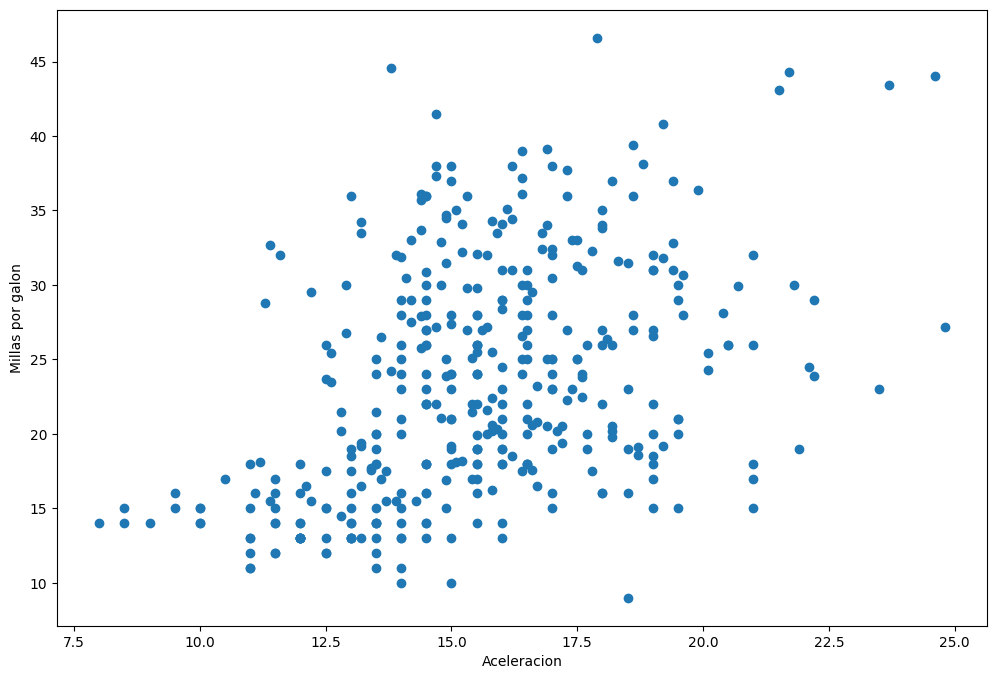

In [17]:
#Vemos algunos plots de las variables
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleracion')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

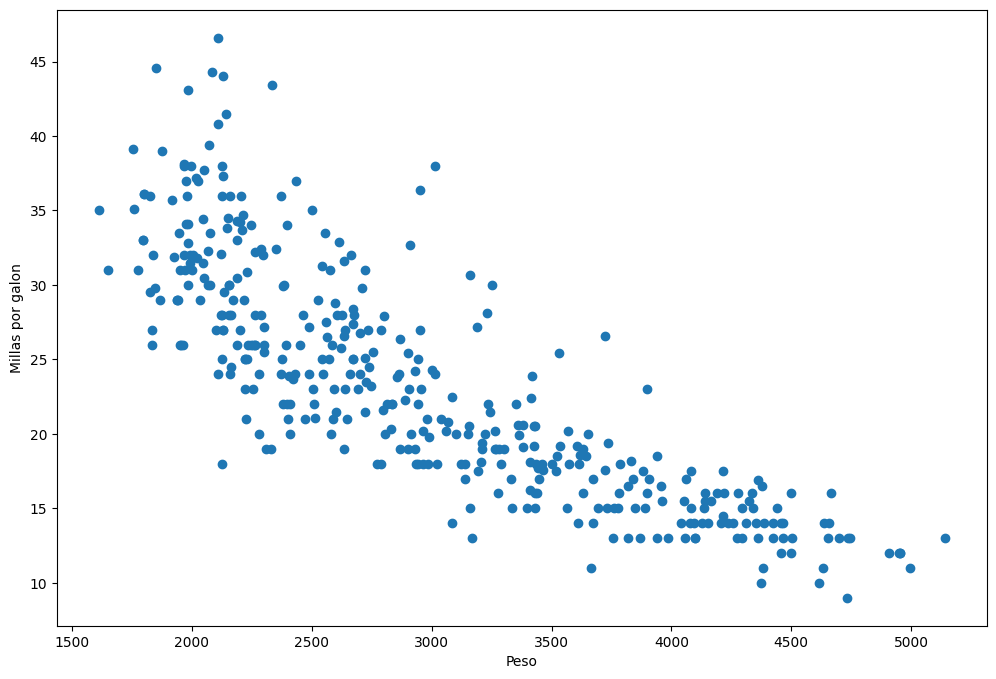

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

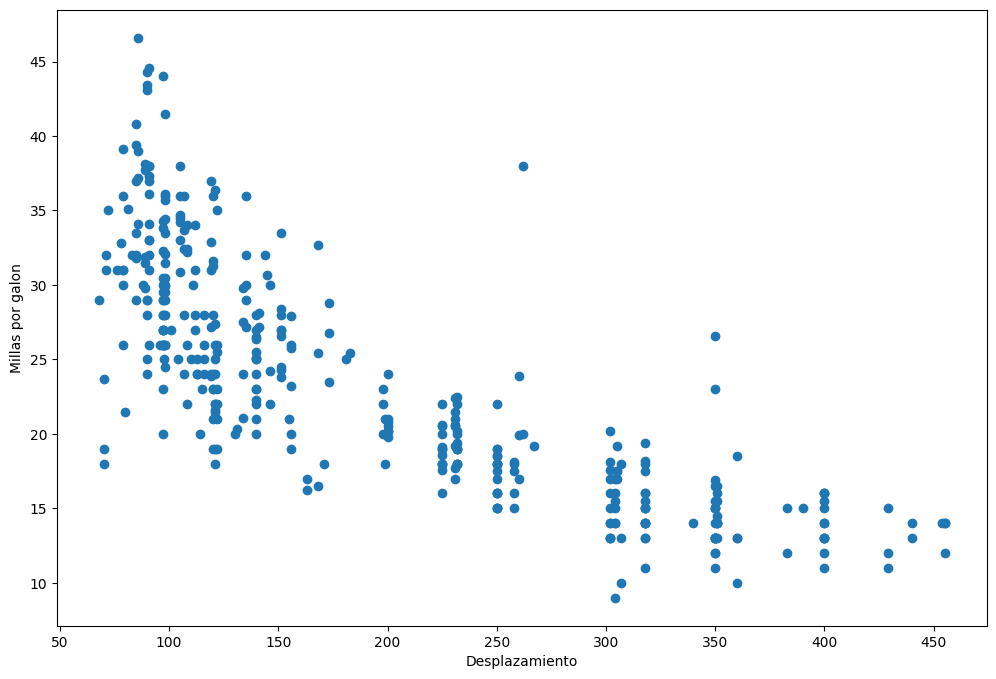

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

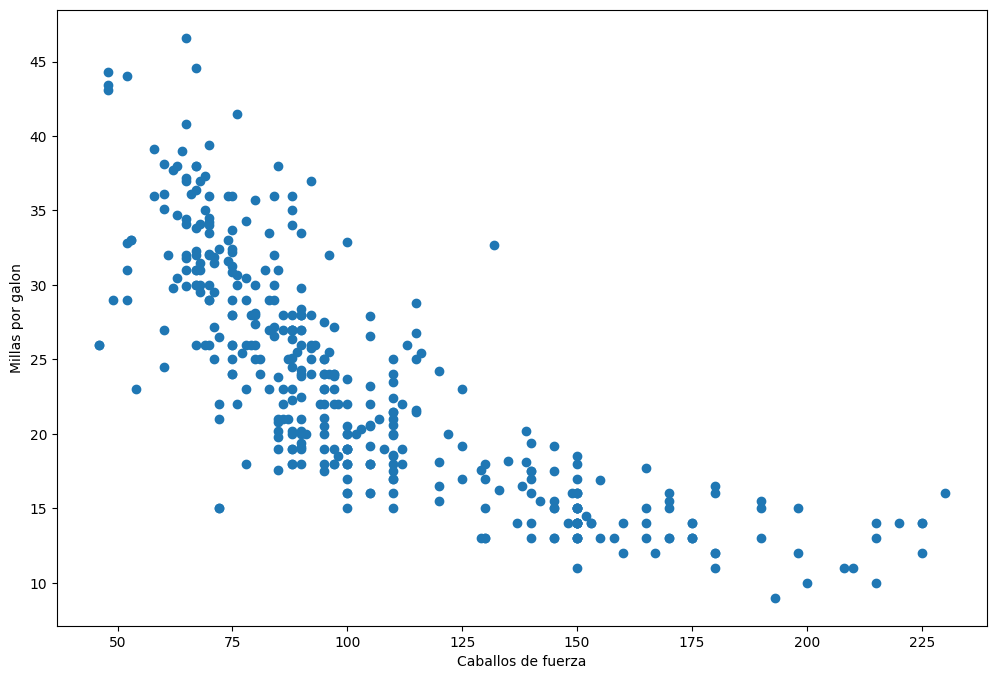

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Caballos de fuerza')
plt.ylabel('Millas por galon')

In [21]:
#Análisis de Correlaciones
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


Text(0.5, 1.0, 'Heatmap correlaciones')

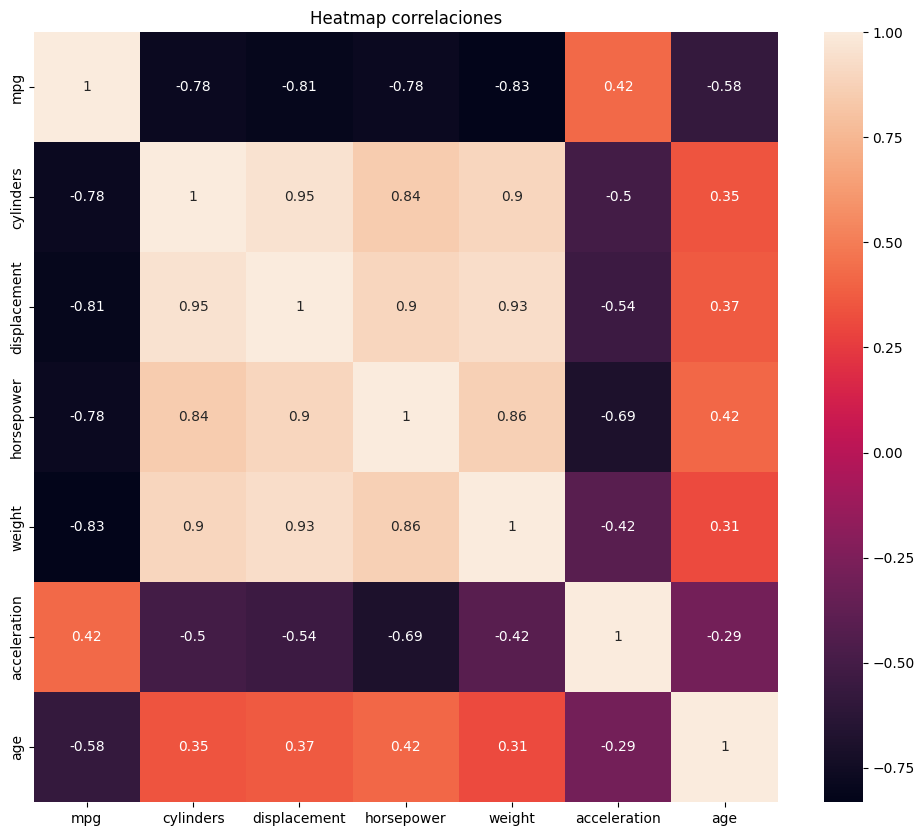

In [22]:
#Matriz de correlacion
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True).set_title("Heatmap correlaciones")

In [23]:
#Definimos matriz de medidas de evaluación del modelo
def get_metrics(Y_test,pred):
    mae = round(mean_absolute_error(Y_test,pred),3)
    mse = round(mean_squared_error(Y_test, pred), 3)
    rmse = round(root_mean_squared_error(Y_test, pred), 3)
    mape = round(mean_absolute_percentage_error(Y_test, pred), 3)
    r2 = round(r2_score(Y_test,pred), 4)
    ev = round(explained_variance_score(Y_test,pred), 4)
    return {'mae':mae,'mse':mse,'rmse':rmse, 'mape':mape,'r2':r2,'ev':ev}

In [24]:
#Regresion lineal con varias caracteristicas
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration']]
Y = automobile_df['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

In [25]:
### variables para guardar información relevante de los modelos
models = {}
coefs = {}
cols = ['displacement', 'horsepower', 'weight', 'acceleration']

#Linear regresion
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
pred = reg_model.predict(X_test)
models['linear'] = get_metrics(Y_test,pred)
coefs['linear'] = reg_model.coef_

#Ridge regresion
alpha = 0.5
ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train,Y_train)
pred = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test,pred)
coefs['ridge'] = ridge_model.coef_

#RidgeCV
alphas = [0.1, 0.5, 0.8]
ridgeCV_model = RidgeCV(alphas=alphas)
ridgeCV_model.fit(X_train,Y_train)
pred = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test,pred)
coefs['ridgeCV'] = ridgeCV_model.coef_

#Lasso validation
alpha = 0.5
lasso_model = Lasso(alpha=alpha, random_state=13)
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test,pred)
coefs['lasso'] = lasso_model.coef_

#LassoCV
alphas = [0.1, 0.5, 0.8]
lassoCV_model = LassoCV(alphas=alphas, random_state=13)
lassoCV_model.fit(X_train, Y_train)
pred = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test,pred)
coefs['lassoCV'] = lassoCV_model.coef_

#ElasticNet
elastic_model = ElasticNet(random_state=13)
elastic_model.fit(X_train, Y_train)
pred = elastic_model.predict(X_test)
models['elastic'] = get_metrics(Y_test,pred)
coefs['elastic'] = elastic_model.coef_

#ElasticNetCV
elasticCV_model = ElasticNetCV(random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

#DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0)
tree_model = tree_model.fit(X_train, Y_train)
pred = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test,pred)

#Verificación de resultados
df_coef = pd.DataFrame.from_dict(coefs,orient='index',columns=cols).reset_index()
df_metrics = pd.DataFrame.from_dict(models)

In [26]:
df_metrics

,linear,ridge,ridgeCV,lasso,lassoCV,elastic,elasticCV,decision_tree
mae,3.3320,3.3320,3.3320,3.2930,3.2910,3.2930,3.2620,3.2060
mse,18.6130,18.6130,18.6130,18.1580,18.1370,18.1560,17.8670,20.8400
rmse,4.3140,4.3140,4.3140,4.2610,4.2590,4.2610,4.2270,4.5650
mape,0.1500,0.1500,0.1500,0.1480,0.1480,0.1480,0.1460,0.1410
r2,0.6845,0.6845,0.6845,0.6922,0.6925,0.6922,0.6971,0.6467
ev,0.6875,0.6875,0.6875,0.6952,0.6955,0.6952,0.7003,0.6502


In [27]:
df_coef

,index,displacement,horsepower,weight,acceleration
0,linear,-0.000785,-0.042972,-0.005685,0.148258
1,ridge,-0.000786,-0.042979,-0.005684,0.148170
2,ridgeCV,-0.000787,-0.042984,-0.005684,0.148117
3,lasso,-0.002479,-0.054486,-0.005227,0.000000
4,lassoCV,-0.002492,-0.053632,-0.005259,0.000000
5,elastic,-0.002505,-0.054383,-0.005229,0.000000
6,elasticCV,-0.002859,-0.039293,-0.005779,0.000000


In [28]:
#Realizamos hipertuning de parametros con gridcv para intentar mejorar el modelo

#Utilizaremos grid search para realizar hipertuning de parametros
param_regression = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000, 10000, 100000, 1000000 ]
        }

param_decisiontree={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

ridge_model = Ridge()
ridgeCV_model = RidgeCV()
lasso_model = Lasso()
lassoCV_model = LassoCV()
elastic_model = ElasticNet()
elasticCV_model = ElasticNetCV()
tree_model = DecisionTreeRegressor()

modelos = [ridge_model,lasso_model,elastic_model]
modelos_nombres = ['ridge_model','lasso_model','elastic_model']

for modelo in modelos:
    grid_cv_model = GridSearchCV(estimator=modelo,
                        param_grid=param_regression,
                        scoring='neg_mean_absolute_error',
                        cv=5,
                        return_train_score=True,
                        verbose=1)

    # fiting GridSearchCV() with X_train and y_train
    grid_cv_model.fit(X_train,Y_train)

    print(f"Modelo: {modelos_nombres[modelos.index(modelo)]} Mejor parametro:{grid_cv_model.best_params_}")

grid_cv_model = GridSearchCV(estimator=tree_model,
                        param_grid=param_decisiontree,
                        scoring='neg_mean_absolute_error',
                        cv=5,
                        return_train_score=True,
                        verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,Y_train)

print(f"Modelo: decision tree Mejor parametro:{grid_cv_model.best_params_}")

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Modelo: ridge_model Mejor parametro:{'alpha': 100000}
Fitting 5 folds for each of 31 candidates, totalling 155 fits
Modelo: lasso_model Mejor parametro:{'alpha': 5.0}
Fitting 5 folds for each of 31 candidates, totalling 155 fits
Modelo: elastic_model Mejor parametro:{'alpha': 9.0}
Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
147000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\si

Modelo: decision tree Mejor parametro:{'max_depth': 11, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\arayajo01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [ ]:
#Corremos el modelo nuevamente con los hiperparametros tuneados
#Regresion lineal con varias características
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration']]
Y = automobile_df['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

### variables para guardar información relevante de los modelos
models = {}
coefs = {}
cols = ['displacement', 'horsepower', 'weight', 'acceleration']

#Linear regresion
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
pred = reg_model.predict(X_test)
models['linear'] = get_metrics(Y_test,pred)
coefs['linear'] = reg_model.coef_

#Ridge regresion
alpha = 100000
ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train,Y_train)
pred = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test,pred)
coefs['ridge'] = ridge_model.coef_

#RidgeCV
alphas = [0.1, 0.5, 100000]
ridgeCV_model = RidgeCV(alphas=alphas)
ridgeCV_model.fit(X_train,Y_train)
pred = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test,pred)
coefs['ridgeCV'] = ridgeCV_model.coef_

#Lasso validation
alpha = 5
lasso_model = Lasso(alpha=alpha, random_state=13)
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test,pred)
coefs['lasso'] = lasso_model.coef_

#LassoCV
alphas = [0.1, 0.5, 5]
lassoCV_model = LassoCV(alphas=alphas, random_state=13)
lassoCV_model.fit(X_train, Y_train)
pred = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test,pred)
coefs['lassoCV'] = lassoCV_model.coef_

#ElasticNet
alpha = 9
elastic_model = ElasticNet(alpha=alpha, random_state=13)
elastic_model.fit(X_train, Y_train)
pred = elastic_model.predict(X_test)
models['elastic'] = get_metrics(Y_test,pred)
coefs['elastic'] = elastic_model.coef_

#ElasticNetCV
alphas = [0.1, 0.5, 9]
elasticCV_model = ElasticNetCV(alphas=alphas, random_state=13)
elasticCV_model.fit(X_train, Y_train)
pred = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test,pred)
coefs['elasticCV'] = elasticCV_model.coef_

#DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth= 11, max_features= 'log2', max_leaf_nodes= 20, min_samples_leaf = 5, min_weight_fraction_leaf= 0.1, splitter = 'best', random_state=13)
tree_model = tree_model.fit(X_train, Y_train)
pred = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test,pred)

#Verificación de resultados
df_coef = pd.DataFrame.from_dict(coefs,orient='index',columns=cols).reset_index()
df_metrics = pd.DataFrame.from_dict(models)


In [31]:
df_metrics

,linear,ridge,ridgeCV,lasso,lassoCV,elastic,elasticCV,decision_tree
mae,3.3320,3.2470,3.2470,3.2670,3.2670,3.2680,3.2680,3.0080
mse,18.6130,17.7050,17.7050,17.9000,17.9000,17.9090,17.9090,16.3680
rmse,4.3140,4.2080,4.2080,4.2310,4.2310,4.2320,4.2320,4.0460
mape,0.1500,0.1450,0.1450,0.1460,0.1460,0.1460,0.1460,0.1340
r2,0.6845,0.6999,0.6999,0.6966,0.6966,0.6964,0.6964,0.7225
ev,0.6875,0.7029,0.7029,0.6997,0.6997,0.6996,0.6996,0.7242


In [32]:
df_coef

,index,displacement,horsepower,weight,acceleration
0,linear,-0.000785,-0.042972,-0.005685,0.148258
1,ridge,-0.008166,-0.024282,-0.005765,0.003372
2,ridgeCV,-0.008166,-0.024282,-0.005765,0.003372
3,lasso,-0.002642,-0.041614,-0.005713,0.000000
4,lassoCV,-0.002642,-0.041614,-0.005713,0.000000
5,elastic,-0.002799,-0.042320,-0.005667,0.000000
6,elasticCV,-0.002799,-0.042320,-0.005667,0.000000


En cuanto a las métricas, el método de Ridge posee medidas de error menores y tanto r2 como ev mayores que los demás modelos, por lo cual tomaremos los coeficientes del modelo de Ridge con hipertuning de parámetros para realizar nuestro modelo.


**mpg** = -0.008166* **displacement**-0.024282* **horsepower**-0.005765* **weight**+0.003372* **acceleration**